In [1]:
from tools import *
from nltk.book import *
%matplotlib inline

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Chap1 语言处理与Python

目的：

1.  简单的程序如何与大规模的文本结合？
2.  如何自动地提取出关键字和词组？如何使用它们来总结文本的风格和内容？
3.  Python为文本处理提供了哪些工具和技术？
4.  自然语言处理中还有哪些有趣的挑战？

## 1.3 计算语言：简单的统计

In [2]:
saying = ['After', 'all', 'is', 'said', 'and', 'done', 'more', 'is', 'said', 'than', 'done']
print("sorted(saying)= ", sorted(saying))
tokens=set(saying)
print("set(saying)= ", tokens)
tokens=sorted(tokens)
print("tokens= sorted(set(saying))= ", tokens)
print("tokens[-3:]= ", tokens[-3:])

sorted(saying)=  ['After', 'all', 'and', 'done', 'done', 'is', 'is', 'more', 'said', 'said', 'than']
set(saying)=  {'and', 'After', 'is', 'said', 'all', 'than', 'more', 'done'}
tokens= sorted(set(saying))=  ['After', 'all', 'and', 'done', 'is', 'more', 'said', 'than']
tokens[-3:]=  ['more', 'said', 'than']


### 1.3.1 频率分布

In [3]:
fdist1=FreqDist(text1)
print("FreqDist(text1)= ", fdist1)
fdist1

FreqDist(text1)=  <FreqDist with 19317 samples and 260819 outcomes>


FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

In [4]:
# FreqDist 的切片
print("fdist1.most_common(50)= ",fdist1.most_common(50))

fdist1.most_common(50)=  [(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024), ('a', 4569), ('to', 4542), (';', 4072), ('in', 3916), ('that', 2982), ("'", 2684), ('-', 2552), ('his', 2459), ('it', 2209), ('I', 2124), ('s', 1739), ('is', 1695), ('he', 1661), ('with', 1659), ('was', 1632), ('as', 1620), ('"', 1478), ('all', 1462), ('for', 1414), ('this', 1280), ('!', 1269), ('at', 1231), ('by', 1137), ('but', 1113), ('not', 1103), ('--', 1070), ('him', 1058), ('from', 1052), ('be', 1030), ('on', 1005), ('so', 918), ('whale', 906), ('one', 889), ('you', 841), ('had', 767), ('have', 760), ('there', 715), ('But', 705), ('or', 697), ('were', 680), ('now', 646), ('which', 640), ('?', 637), ('me', 627), ('like', 624)]


In [5]:
# FreqDist 的索引
print("fdist1['whale']= ",fdist1['whale'])

fdist1['whale']=  906


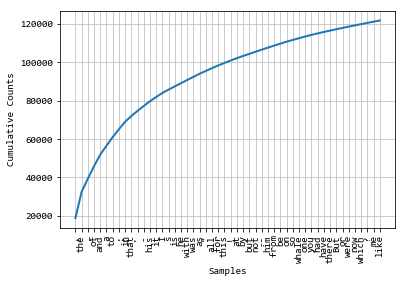

In [6]:
# 图1-4：50个最常用词的累积频率图
fdist1.plot(50, cumulative=True)

In [7]:
# hapaxes() 找出低频词，只出现一次的单词
print("fdist1.hapaxes()[:50]= ",fdist1.hapaxes()[:50])
print("len(fdist1.hapaxes())= ",len(fdist1.hapaxes()))

fdist1.hapaxes()[:50]=  ['Herman', 'Melville', ']', 'ETYMOLOGY', 'Late', 'Consumptive', 'School', 'threadbare', 'lexicons', 'mockingly', 'flags', 'mortality', 'signification', 'HACKLUYT', 'Sw', 'HVAL', 'roundness', 'Dut', 'Ger', 'WALLEN', 'WALW', 'IAN', 'RICHARDSON', 'KETOS', 'GREEK', 'CETUS', 'LATIN', 'WHOEL', 'ANGLO', 'SAXON', 'WAL', 'HWAL', 'SWEDISH', 'ICELANDIC', 'BALEINE', 'BALLENA', 'FEGEE', 'ERROMANGOAN', 'Librarian', 'painstaking', 'burrower', 'grub', 'Vaticans', 'stalls', 'higgledy', 'piggledy', 'gospel', 'promiscuously', 'commentator', 'belongest']
len(fdist1.hapaxes())=  9002


In [8]:
# 这个用法已经废弃
vocabulary1 = fdist1.keys()
print("list(vocabulary1)[:50]= ",list(vocabulary1)[:50])

list(vocabulary1)[:50]=  ['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.', '(', 'Supplied', 'a', 'Late', 'Consumptive', 'Usher', 'to', 'Grammar', 'School', ')', 'The', 'pale', '--', 'threadbare', 'in', 'coat', ',', 'heart', 'body', 'and', 'brain', ';', 'I', 'see', 'him', 'now', 'He', 'was', 'ever', 'dusting', 'his', 'old', 'lexicons', 'grammars', 'with', 'queer', 'handkerchief', 'mockingly', 'embellished', 'all']


### 1.3.2 基于细粒度选择单词

-   数学公式：$\{w|w \in V \& P(W) \}$
-   程序代码：`[w for w in V if p(w)]`

In [9]:
V = set(text1)
long_words1 = [w for w in V if len(w) > 15]
print("len(long_words)= ", len(long_words1))
sorted(long_words1)

len(long_words)=  24


['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

In [10]:
# 聊天语料库中所有长度超过 7 个字符，并且出现次数超过 7 次的单词
fdist5 = FreqDist(text5)
long_words5 = [w for w in set(text5) if len(w) > 7 and fdist5[w] > 7]
print("len(long_words5)= ", len(long_words5))
sorted(long_words5)

len(long_words5)=  19


['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

### 1.3.3 词语搭配 和 双连词

**搭配**：是不经常出现在一起的词序列。例如：『red wine』 是一个搭配，而『the wine』不是

要获取搭配，需要从提取文本词汇中的词对(即双连词)，提取双连词使用 bigrams() 函数

In [11]:
doubleWords = list(bigrams(['more', 'is', 'said', 'than', 'done']))
print("doubleWords= ", doubleWords)

doubleWords=  [('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]


In [12]:
# collocations() 寻找出现频率大于基准频率的连词，默认频率=20，默认窗口=2
show_title("text4.collocations()")
print(text4.collocations())
show_title("text8.collocations()")
print(text8.collocations())

=============== >text4.collocations()< ===============
United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties
None
=============== >text8.collocations()< ===============
would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build
None


### 1.3.4 计算其他东西

文本中单词长度序列： [1, 4, 4, 2, 6, 8, 4, 1, 9, 1, 1, 8, 2, 1, 4, 11, 5, 2, 1, 7, 6, 1, 3, 4, 5, 2, 10, 2, 4, 1, 5, 1, 4, 1, 3, 5, 1, 1, 3, 3, 3, 1, 2, 3, 4, 7, 3, 3, 8, 3]
=============== >查看文本中单词长度的分布< ===============
    3     1     4     2     5     6     7     8     9    10    11    12    13    14    15    16    17    18    20 
50223 47933 42345 38513 26597 17111 14399  9966  6428  3528  1873  1053   567   177    70    22    12     1     1 
None


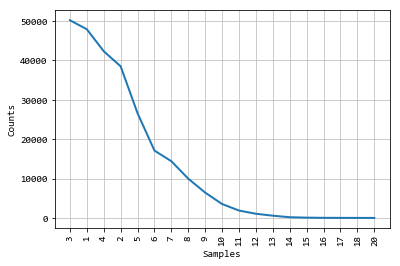

In [13]:
print("文本中单词长度序列：",[len(w) for w in text1][:50])

fdist_word_len_1 = FreqDist([len(w) for w in text1])
show_title("查看文本中单词长度的分布")
print(fdist_word_len_1.tabulate())
fdist_word_len_1.plot()

表1-2：NLTK 频率分布类中定义的常用函数

| 例子                        | 描述                                          |
| --------------------------- | --------------------------------------------- |
| `fdist=FreqDist(samples)`     | 创建包含给定样本的频率分布                    |
| `fdist['word']`              | 给定样本出现的次数                            |
| `fdist.freq('word')`          | 给定样本出现的频率                            |
| `fdist.N()`                   | 样本的总数                                    |
| `fdist.keys()`                | 以频率递减顺序显示样本(好像是错的)            |
| `for word in fdist:`          | 以频率递减顺序遍历样本                        |
| `fdist.most_common(n)`        | 以频率递减顺序显示(样本，次数)元组链表        |
| `fdist.max()`                 | 数值最大的样本                                |
| `fdist.tabulate()`            | 输出频率分布表                                |
| `fdist.plot()`                | 绘制频率分布图                                |
| `fdist.plot(cumulative=True)` | 绘制累积频率分布图                            |
| `fdist1 |= fdist2`           | 基于 fdist2 的统计数据更新 fdist1             |
| `fdist1 < fdist2`             | 测试样本出现的频率 fdist1 中是否小于 fdist2中 |

In [14]:
print("文本中单词长度序列中的关键字：",sorted(fdist_word_len_1.keys()))
print("文本中单词长度序列中的低频关键字(即这类单词长度的单词在文本中出现的较少)：",fdist_word_len_1.hapaxes())
print("文本中单词的个数：",fdist_word_len_1.N(),"==",len(text1))

文本中单词长度序列中的关键字： [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]
文本中单词长度序列中的低频关键字(即这类单词长度的单词在文本中出现的较少)： [18, 20]
文本中单词的个数： 260819 == 260819


In [15]:
print("文本中 5 个出现频率最高的单词长度序列及其出现次数 =", fdist_word_len_1.most_common(5))
print("文本中的样本总数= ", fdist_word_len_1.N())
print("文本中单词长度序列最多的单词出现次数= ", fdist_word_len_1.max())
print("文本中单词长度为 3 的单词出现次数= ", fdist_word_len_1[3])
print("文本中单词长度为 3 的单词出现占比= ", fdist_word_len_1.freq(3))

文本中 5 个出现频率最高的单词长度序列及其出现次数 = [(3, 50223), (1, 47933), (4, 42345), (2, 38513), (5, 26597)]
文本中的样本总数=  260819
文本中单词长度序列最多的单词出现次数=  3
文本中单词长度为 3 的单词出现次数=  50223
文本中单词长度为 3 的单词出现占比=  0.19255882431878046


In [18]:
# 以频率递减的顺序遍历样本
for i, element in enumerate(fdist_word_len_1.elements()):
    if i<100:   # 避免消耗过长时间输出数据
        print(element, end=', ')

1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 